In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist

mnist is the dataset from keras an api of tensorflow of handwritten digits 

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

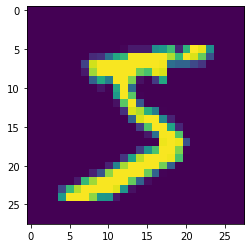

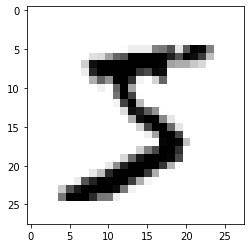

In [6]:
plt.imshow(x_train[0])
plt.show()  #to keep showing the original image
plt.imshow(x_train[0], cmap = plt.cm.binary)  # we dont know if the image is colored or what so we convert it to black and white thats binary

Normalizing the data as the values are from 0 to 255 255 being used for white

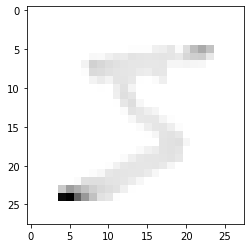

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis=0)
x_test = tf.keras.utils.normalize(x_test, axis=0)
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [8]:
print(x_train[0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

Adding an extra dimention to the train and test data before convolution
for using kernal or filter

In [9]:
img_size = 28
x_trainr = np.array(x_train).reshape(-1, img_size, img_size, 1)
x_testr = np.array(x_test).reshape(-1, img_size, img_size, 1)
x_train.shape


(60000, 28, 28)

Creating a deep neural network 
sequential will connect different layers

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [232]:
model = Sequential()
model.add(Conv2D(6,(3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(400))
model.add(Activation("relu"))

model.add(Dense(120))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [233]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 activation_18 (Activation)  (None, 26, 26, 6)         0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 6)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 activation_19 (Activation)  (None, 11, 11, 16)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                  

In [234]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])


In [235]:
print(len(x_trainr))

60000


Model fitting

In [236]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 16s 11ms/step - loss: 0.5391 - accuracy: 0.8202 - val_loss: 0.2100 - val_accuracy: 0.9350
Epoch 2/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.1340 - accuracy: 0.9585 - val_loss: 0.1303 - val_accuracy: 0.9603
Epoch 3/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0900 - accuracy: 0.9711 - val_loss: 0.0947 - val_accuracy: 0.9719
Epoch 4/5
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0717 - accuracy: 0.9769 - val_loss: 0.0935 - val_accuracy: 0.9733
Epoch 5/5
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0612 - accuracy: 0.9808 - val_loss: 0.0782 - val_accuracy: 0.9764


Using the model on test data to get the accuracy score

In [237]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1317 - accuracy: 0.9731
0.1317099630832672
0.9731000065803528


Predict

In [238]:
predictions = model.predict([x_testr])
print(predictions)

313/313 [==============================] - 2s 5ms/step
[[2.7205872e-13 4.3546334e-12 3.9471755e-09 ... 9.9999988e-01
  3.3106623e-13 3.9182828e-12]
 [8.9284540e-15 1.3309856e-14 1.0000000e+00 ... 1.0278444e-19
  2.7626162e-15 2.8428696e-32]
 [1.4897015e-13 1.0000000e+00 6.6576938e-11 ... 1.0841290e-10
  1.6853588e-11 5.3897902e-13]
 ...
 [1.8563740e-16 1.1868576e-10 2.3329045e-16 ... 5.1991163e-12
  1.5562714e-12 2.6355765e-13]
 [7.7589436e-17 3.1458099e-17 8.3255115e-21 ... 2.7572572e-15
  2.8493399e-10 5.8964003e-14]
 [3.4936598e-15 1.7262569e-23 2.1841869e-20 ... 3.1037642e-27
  4.6722496e-16 4.3457381e-24]]


In [239]:
print(np.argmax(predictions[9993]))

0


In [241]:
from tensorflow.keras.models import load_model

model.save('hdr_model.h5')